# Задание 1

В финальном домашнем задании необходимо ответить на вопрос, какой же алгоритм все таки лучше решает ту или иную задачу. А именно, нужно рассмотреть одну из следующих задач:

* CartPole
* Pendulum
* LunarLender с дискретным пространством действий (по умолчанию)
* LunarLender с непрерывным пространством действий (нужно положить continuous=True, см. пояснения здесь Lunar Lander)
* BipedalWalker

В данной работе рассматривается задача **Pendulum**

In [22]:
import pandas as pd
cem = pd.read_csv("../week2/task2.csv")
cem = cem[(cem["quantile"] == 0.7)&(cem["trajectories"] == 300)]
cem["algorithm"] = "Cross-entropy"
cem = cem[["epoch", "reward", "algorithm"]]
cem["epoch"] = 300 * cem["epoch"]
cem.head()

,epoch,reward,algorithm
2600,0,-1326.501483,Cross-entropy
2601,300,-1192.806975,Cross-entropy
2602,600,-1233.265786,Cross-entropy
2603,900,-1155.399226,Cross-entropy
2604,1200,-1098.168692,Cross-entropy


In [23]:
ppo = pd.read_csv("../week6/task1.csv")
ppo = ppo[ppo["type"] == "Monte Carlo"]
ppo["algorithm"] = "PPO"
ppo["epoch"] = 20 * ppo["epoch"]
ppo = ppo[["epoch", "reward", "algorithm"]]
ppo.head()

,epoch,reward,algorithm
0,0,-1321.559444,PPO
1,20,-1186.658865,PPO
2,40,-1080.387963,PPO
3,60,-1012.303247,PPO
4,80,-960.144111,PPO


In [26]:
sac = pd.read_csv("task1.csv")
sac["algorithm"] = "Soft actor-critic"
sac = sac[["epoch", "reward", "algorithm"]]
sac.head()

,epoch,reward,algorithm
0,0,-1723.977244,Soft actor-critic
1,1,-1491.268851,Soft actor-critic
2,2,-1497.893625,Soft actor-critic
3,3,-1495.858595,Soft actor-critic
4,4,-1167.970910,Soft actor-critic


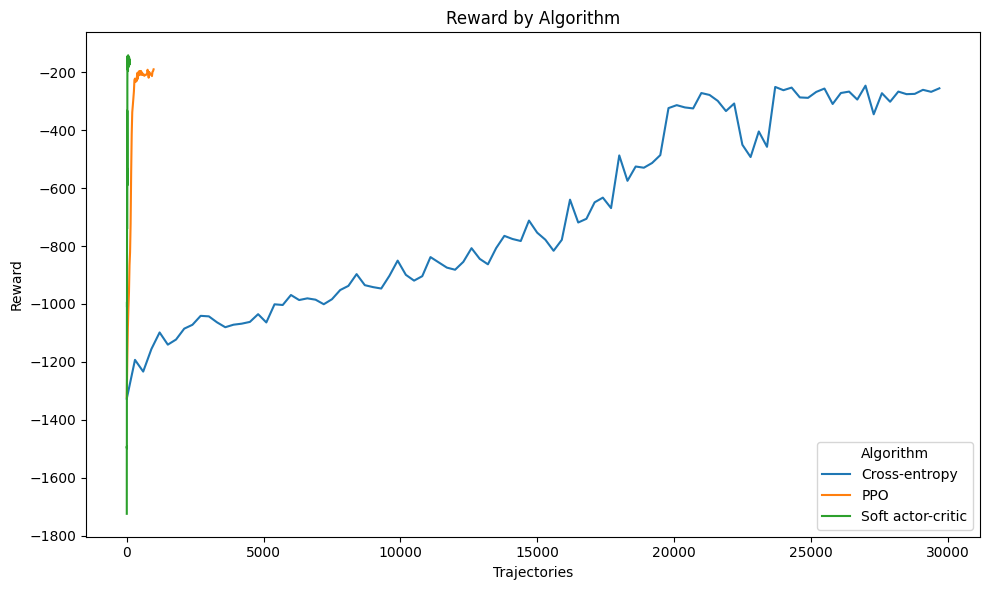

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x='trajectories', y='reward', hue='algorithm', markers=True)

# Set axis labels and title
plt.xlabel('Trajectories')
plt.ylabel('Reward')
plt.title('Reward by Algorithm')

# Show legend
plt.legend(title='Algorithm')

# Show the plot
plt.tight_layout()
plt.show()

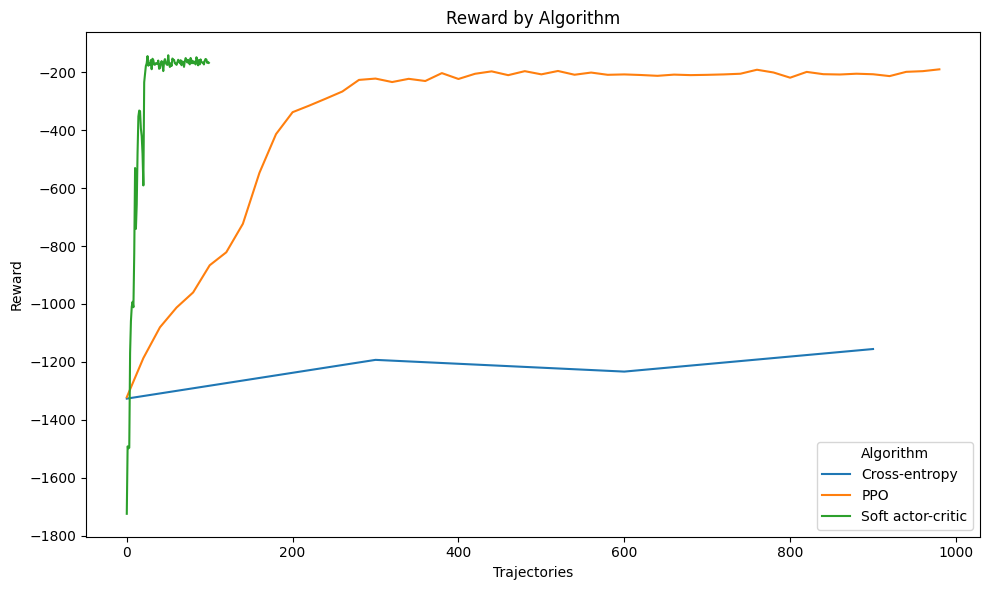

В данной работе сравнивается SAC, PPO и Cross entropy. DQN не рассматривается. Второй график приближает начало обучения, потому что скорость алгоритмов слишком разная. SAC обучается намного быстрее, PPO немного медленнее, кросс энтропии нужно огромное количество обращений к среде, чтоб приблизиться к стабильно высоким наградам.